In [1]:
#import important libraries

In [5]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AAC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
#read data
data = r'C:\Users\AAC\Documents\twitter_validation.csv'
df= pd.read_csv(data)
df

,Public ID,Source,Score,Reviews
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [43]:
df.info

<bound method DataFrame.info of      Public ID               Source       Score  \
0         3364             Facebook  Irrelevant   
1          352               Amazon     Neutral   
2         8312            Microsoft    Negative   
3         4371                CS-GO    Negative   
4         4433               Google     Neutral   
..         ...                  ...         ...   
995       4891  GrandTheftAuto(GTA)  Irrelevant   
996       4359                CS-GO  Irrelevant   
997       2652          Borderlands    Positive   
998       8069            Microsoft    Positive   
999       6960      johnson&johnson     Neutral   

                                               Reviews  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..           

In [44]:
print(df.columns)

Index(['Public ID', 'Source', 'Score', 'Reviews'], dtype='object')


In [15]:
df.shape

(1000, 4)

In [45]:
df.dtypes

Public ID     int64
Source       object
Score        object
Reviews      object
dtype: object

In [19]:
df.duplicated().sum()

0

In [46]:
df.isna().sum()

Public ID    0
Source       0
Score        0
Reviews      0
dtype: int64

In [21]:
#Staistical Analysis

In [47]:
df.describe()

,Public ID
count,1000.000000
mean,6432.088000
std,3728.310569
min,6.000000
25%,3247.750000
50%,6550.000000
75%,9661.750000
max,13197.000000


# Data Visualization

In [49]:
# Sentiment analysis using NLTK
sid = SentimentIntensityAnalyzer()
df['Sentiment Score'] = df['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])


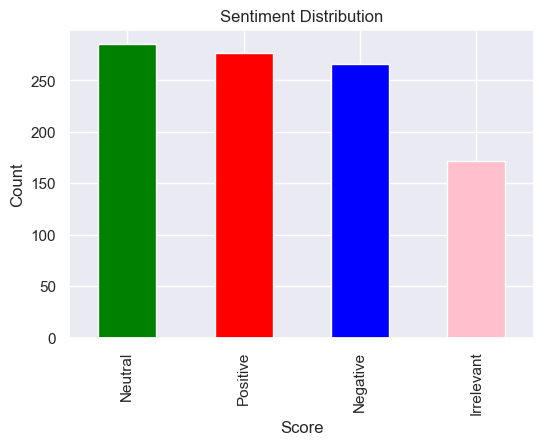

In [50]:
# Visualize sentiment distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
df['Score'].value_counts().plot(kind='bar', color=['green', 'red', 'blue','pink'])
plt.title('Sentiment Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

<Figure size 600x400 with 0 Axes>

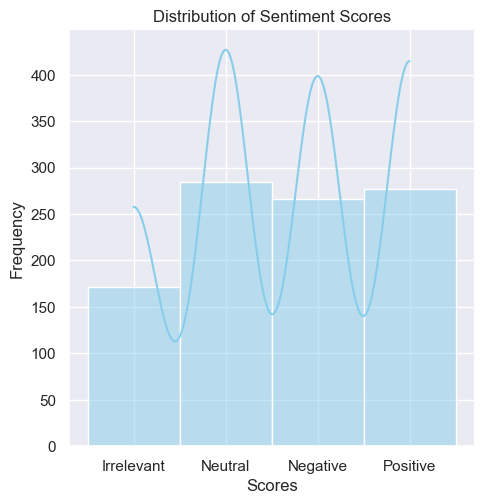

In [51]:
# Distribution plot for sentiment scores
plt.figure(figsize=(6, 4))
sns.displot(df, x='Score', kde=True, color='skyblue', bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

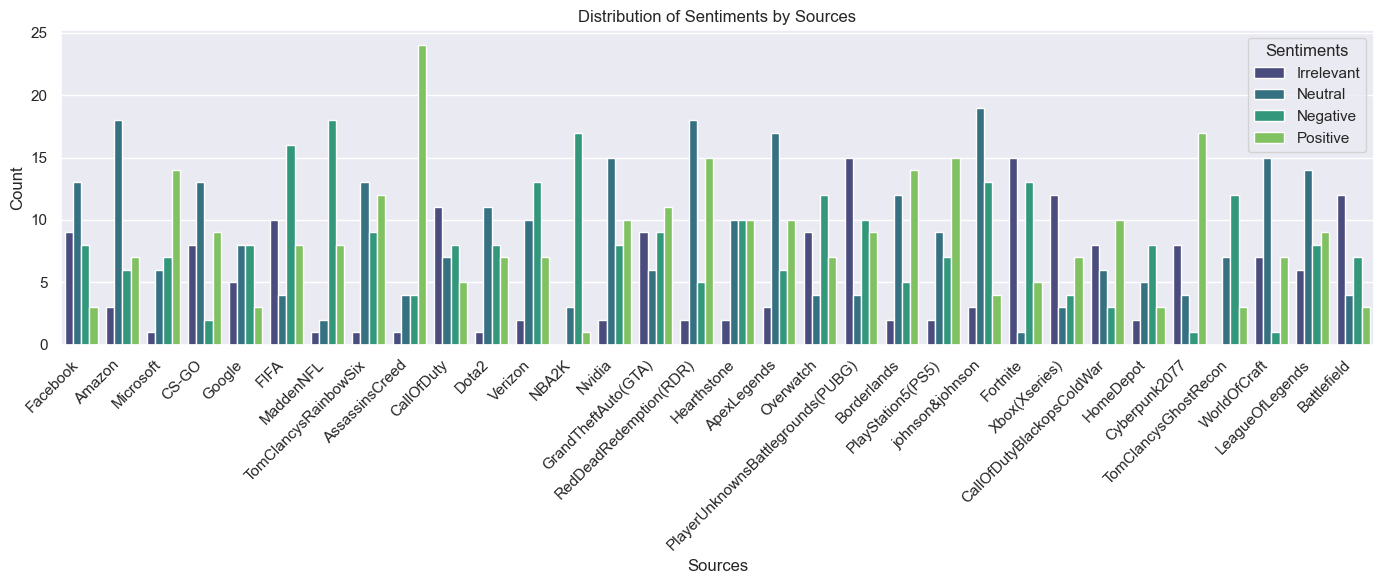

In [57]:
#distribution of sentiments by sources
plt.figure(figsize=(14, 6))  
sns.countplot(x='Source', hue='Score', data=df, palette='viridis')
plt.title('Distribution of Sentiments by Sources')
plt.xlabel('Sources')
plt.ylabel('Count')
plt.legend(title='Sentiments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

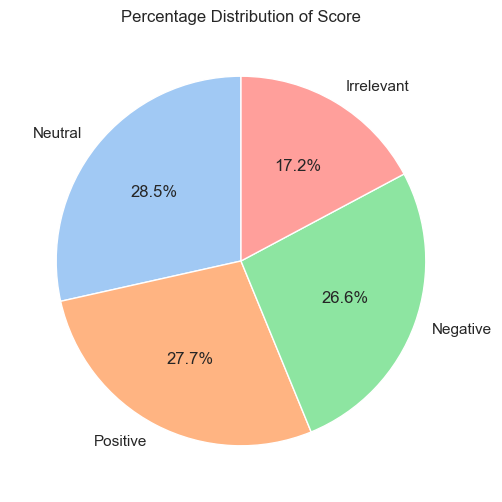

In [63]:
#Percentage Distribution of Score
sentiment_counts = df['Score'].value_counts()

sns.set_theme(style='darkgrid', palette='pastel')
plt.figure(figsize=(8, 6))

# Plotting a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Percentage Distribution of Score')

plt.show()



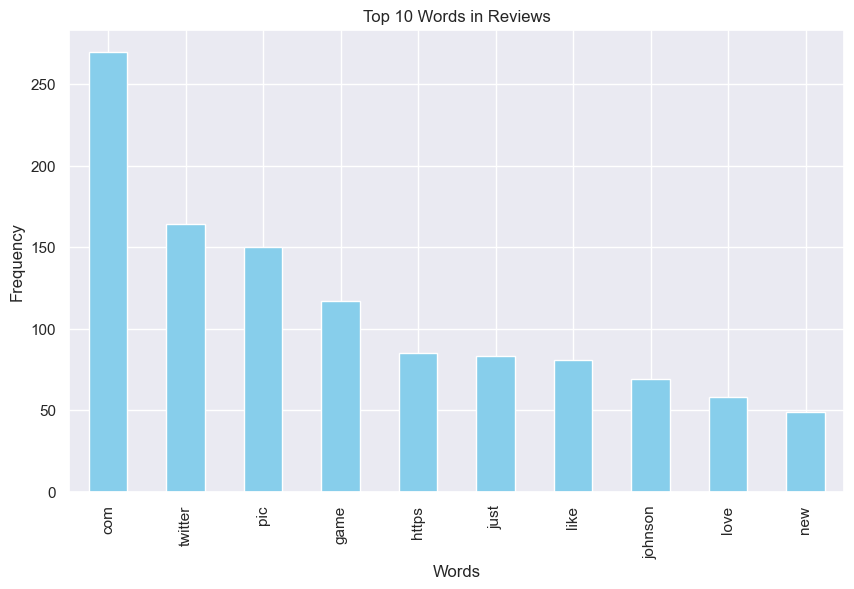

In [62]:
#top 10 words
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


# Preprocess the text data
df['Reviews'] = df['Reviews'].str.lower()

# Use CountVectorizer to transform the text data into a bag-of-words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Reviews'])


word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the sum of each word occurrence
word_occurrences = word_counts.sum()

# Get the top 10 words
top_words = word_occurrences.nlargest(10)

# Plot the top 10 words
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 10 Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
